[수학점수 예측과 시각화]
학습데이터 그래프로 출력하기 / 임의의 두점으로 데이터 학습모델 추정 / 
y 값 최대최도데이터를 이용한 학습모델 추정 / 평균평균제곱근 오차를 통한 학습모델 비교/
최적의 학습모델 추정

## 1단계 학습데이터 그래프로 출력하기

In [ ]:

import tensorflow. as tf
tf.compat.v1.disable_eager_execution()
sess=tf.compat.v1.Session()

In [1]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()


Instructions for updating:
non-resource variables are not supported in the long term


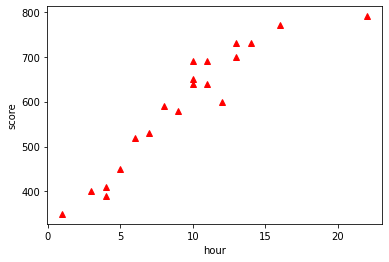

In [2]:
## 학습데이터 그래프로 출력하기
# 여기서 x는 시간 y는 수학점수 (각각20개)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x_data = np.array([4.0,9,10,14,4,7,12,22,1,3,8,11,5,6,10,11,16,13,13,10])
y_data = np.array([390.0,580,650,730,410,530,600,790,350,400,590,640,450,520,690,690,770,700,730,640])

plt.xlabel("hour")
plt.ylabel("score")
plt.plot(x_data, y_data, 'r^')  ## 점을 빨간색 ^로 그려라


## 2단계  임의(random) 의 두점(p1과 p2)으로 데이터 학습모델 추정

In [3]:
##  임의(random) 의 두점(p1과 p2)으로 데이터 학습모델 추정
# 여기서 shape[0]의 의미는 20개 데이터 즉 0-19까지의 랜덤숫자
p1 = np.random.randint(x_data.shape[0])
p2 = np.random.randint(x_data.shape[0])
print(p1,p2)
## 랜덤이라서 p1,p2가 같이 나오는 경우가 잇음..그래서 이걸 방지하려고 shuffle함수!

7 17


In [4]:
##  임의(random) 의 중복되지 않는(shuffle)두점(p1과 p2)으로 데이터 학습모델 추정

a= np.arange(20) ##0-19까지의 랜덤숫자
print(a)
np.random.shuffle(a) ## 중복이 안되도록 shuffle
print(a[0], a[1]) ## 중복이 안되도록 두개의 난수 [0] 과 [1]선택

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
11 12


In [5]:
## 위에서 배운대로 두개의 점을 뽑음
idx = np.arange(20)
np.random.shuffle(idx)
p1 = idx[0]
p2 = idx[1]

## 두점을 아니까 y절편(b1)과 기울기(w1)를 구할수 있음!


import tensorflow as tf
tf.compat.v1.disable_eager_execution()
sess=tf.compat.v1.Session()

## 뒤에 ,1을 추가 함으로써 a를 [[p1,1],[p2,1]] 모양의 2*2 정방행렬로 만들어줌
a = tf.constant([[x_data[p1], 1.0], [x_data[p2], 1.0]])  #2행2열
y = tf.constant([y_data[p1], y_data[p2]], shape=(2,1)) #2행1열로 지정

## a(2*2의 정방행렬)의 역행렬을 구해서 y와 곱하면 b1과 w1구해짐
## 정방의 역행렬도 2*2 거기에 2*1을 곱하면 2*1의 형태
z = sess.run(tf.matmul(tf.linalg.inv(a),y))

w1 = z[0,0]
b1 = z[1,0]
print(w1, b1)

26.666672 383.33325


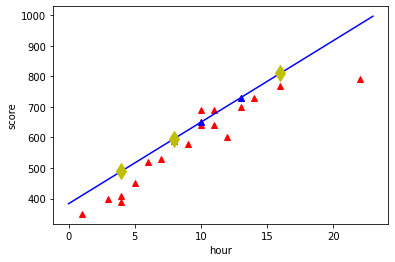

In [11]:
## 1단계에서 그린 학습데이터랑 두점으로 추정한 학습모델 같이 그래프로 나타내기
# 학습데이터 그래프
plt.xlabel("hour")
plt.ylabel("score")
plt.plot(x_data, y_data, 'r^')  ## 점을 빨간색 ^로 그려라

# 임으로 선택한 임의의 두점
x2 = [x_data[p1], x_data[p2]]
h2 = [y_data[p1], y_data[p2]]
plt.plot(x2, h2, 'b^') ## 점을 파란색 ^로 그려라

## 이건 tensorflow의 버전문제로 placeholder가 구현안되서 넣어준거
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# 임으로 선택한 두점을 이어주는 직선
x = tf.placeholder(tf.float32)
x2 = np.linspace(0,23,30)  ## x의 범위를 0에서 30까지 23개의 구간으로 나누어서 그래프 그린다
h = w1*x +b1
h2 = sess.run(h, feed_dict={x: x2})
plt.plot(x2, h2, "b")

# x값(시간)을 변경해서 해당하는 수학점수 예측하기
x2 = [4,8,16] ## 4,8,16시간을 공부한다면?
h2 = sess.run(h, feed_dict={x: x2})
plt.plot(x2, h2, 'yd', markersize=12) # 노란색으로 나타내봐라

## 3단계  y값의 최대와 최소 데이터를 이용해 학습 모델 추정하기

In [15]:
## y값의 최대와 최소 데이터를 이용해 학습 모델 추정하기
p1= sess.run(tf.argmin(y_data))
p2 = sess.run(tf.argmax(y_data))

print(p1,p2)
## 두점을 아니까 y절편(b2)과 기울기(w2)를 구할수 있음!
a = tf.constant([[x_data[p1], 1.0], [x_data[p2], 1.0]])
y = tf.constant([[y_data[p1], 1.0], [y_data[p2], 1.0]])

## a(2*2의 정방행렬)의 역행렬을 구해서 y와 곱하면 b2과 w2구해짐
## 정방의 역행렬도 2*2 거기에 2*1을 곱하면 2*1의 형태
z = sess.run(tf.matmul(tf.linalg.inv(a),y))

w2 = z[0,0]
b2 = z[1,0]
print(w2, b2)

8 7
20.952383 329.04764


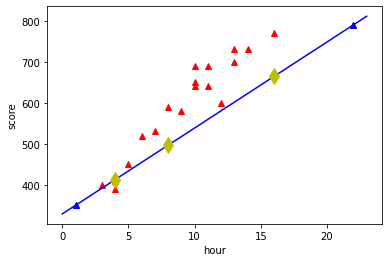

In [16]:
## 1단계에서 그린 학습데이터랑 y의 최대최소로 추정한 학습모델 같이 그래프로 나타내기
## 아까랑 같지만 w2,b2만 달라짐
# 학습데이터 그래프
plt.xlabel("hour")
plt.ylabel("score")
plt.plot(x_data, y_data, 'r^')  ## 점을 빨간색 ^로 그려라

# 임으로 선택한 임의의 두점(y의최대최소)
x2 = [x_data[p1], x_data[p2]]
h2 = [y_data[p1], y_data[p2]]
plt.plot(x2, h2, 'b^') ## 점을 파란색 ^로 그려라

## 이건 tensorflow의 버전문제로 placeholder가 구현안되서 넣어준거
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# 임으로 선택한 두점을 이어주는 직선
x = tf.placeholder(tf.float32)
x2 = np.linspace(0,23,30)  ## x의 범위를 0에서 30까지 23개의 구간으로 나누어서 그래프 그린다
h = w2*x +b2
h2 = sess.run(h, feed_dict={x: x2})
plt.plot(x2, h2, "b")

# x값(시간)을 변경해서 해당하는 수학점수 예측하기
x2 = [4,8,16] ## 4,8,16시간을 공부한다면?
h2 = sess.run(h, feed_dict={x: x2})
plt.plot(x2, h2, 'yd', markersize=12) # 노란색으로 나타내봐라

## 4단계 평균평균제곱근 오차를 통한 학습모델 비교

위에서 만든 임의의 2값 학습모델, y최대최소 학습모델을 서로 비교해보기

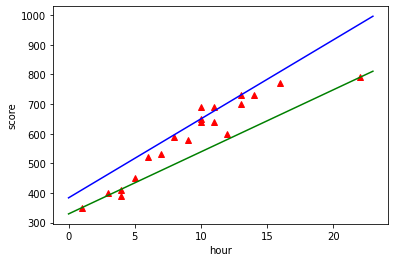

In [19]:
# 먼져 그래프로 직관적으로 보기
# 학습데이터 그래프
plt.xlabel("hour")
plt.ylabel("score")
plt.plot(x_data, y_data, 'r^')  ## 점을 빨간색 ^로 그려라


x2 = np.linspace(0,23,30)

# 임의값 그래프
h = w1*x +b1
h2 = sess.run(h, feed_dict={x: x2})
plt.plot(x2, h2, "b") ## 파란색

# y최대최소 그래프
h = w2*x +b2
h2 = sess.run(h, feed_dict={x: x2})
plt.plot(x2, h2, "g") ## 초록색

파란그래프보다 최대최소를 이용한 그린그래프가 전체데이터를 더욱 잘 설명해줌!

In [21]:
## 평균제곱오차로 수치적으로 비교해보기
## 똑같은걸 2번 돌리니까 아예 구조를 만들기
w = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
x = tf.placeholder(tf.float32)

h = w*x + b
## 평균제곱오차 구하는 공식
rmse = tf.sqrt(tf.reduce_mean(tf.square(h - y_data)))

print(sess.run(rmse, feed_dict={w:w1, b:b1, x:x_data}))  ## 첫번째 분석:임의두값
print(sess.run(rmse, feed_dict={w:w2, b:b2, x:x_data}))  ## 두번째 분석:y의 최대최소

64.04423
83.42189


임의두값 방법은 값에따라서 학습오차가 클수도 작을수도 있지만, 최대최소를 이용하면
평균적으로 학습오차가 가장적음(학습오차 83.42)

## 5단계: 최적의 학습모델 추정_의사역행렬

In [31]:
## 학습데이터 x,y를 공급받을 두개의 placeholder 지정
x = tf.placeholder(tf.float32, shape=(20,1))
y = tf.placeholder(tf.float32, shape=(20,1))
## 같은 형태로 지정된 벡터 T만들어서 x와 concate하기 : A생성
T = tf.ones([20,1], dtype=tf.float32)  #20*1모양에 1으로만 이루어진 벡터 T
print(T)
A = tf.concat([x,T],1) ## [x,T]는 20*1모양인데 거기에 열이 1더해진거 즉 20*2형태
print(A)

## x과 T가 concate된것을 의사역행렬하고 y에곱하기 : 그러면 기울기와 절편나옴
## A는 정방행렬이 아니기 때문에 의사역행렬에 y를 곱해서 로 기울기와 절편b를 구해야함
pinv = tf.matmul(tf.linalg.inv(tf.matmul(tf.transpose(A), A)), tf.transpose(A))
w = tf.matmul(pinv,y)
w_ = sess.run(w, feed_dict={x:x_data.reshape((20,1)), y:y_data.reshape((20,1))})
w0 = w_[0]  # 기울기 w0
b0 = w_[1]  # y절편
print(w_)

Tensor("ones_7:0", shape=(20, 1), dtype=float32)
Tensor("concat_6:0", shape=(20, 2), dtype=float32)
[[ 25.326447]
 [353.16498 ]]


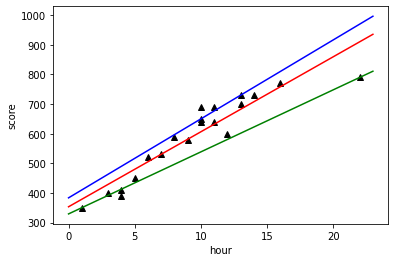

In [34]:
# 3가지 모두 그래프로 그려보기
# 학습데이터 그래프
plt.xlabel("hour")
plt.ylabel("score")
plt.plot(x_data, y_data, 'k^')  ## 점을 검은색 ^로 그려라


x2 = np.linspace(0,23,30)
x = tf.placeholder(tf.float32)

# 임의값 그래프
h = w1*x +b1
h2 = sess.run(h, feed_dict={x: x2})
plt.plot(x2, h2, "b") ## 파란색

# y최대최소 그래프
h = w2*x +b2
h2 = sess.run(h, feed_dict={x: x2})
plt.plot(x2, h2, "g") ## 초록색

# 의사역행렬 그래프
h = w0*x +b0
h2 = sess.run(h, feed_dict={x: x2})
plt.plot(x2, h2, "r") ## 빨간색